In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


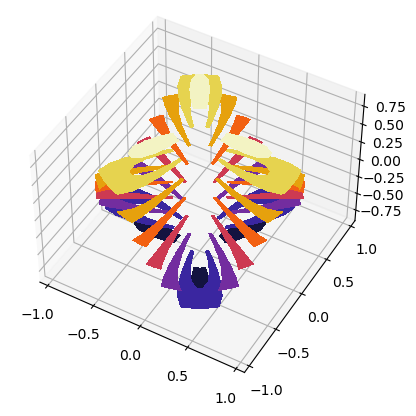

In [2]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

# First create the x, y, z coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 0.25

# Create the mesh in polar coordinates and compute x, y, z.
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create a custom triangulation.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

ax = plt.figure().add_subplot(projection='3d')
ax.tricontourf(triang, z, cmap=plt.cm.CMRmap)

# Customize the view angle so it's easier to understand the plot.
ax.view_init(elev=45.)

plt.show()

In [3]:
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df.head()

data = []
layout = dict(
    title = 'New Walmart Stores per year 1962-2006<br>\
Source: <a href="http://www.econ.umn.edu/~holmes/data/WalMart/index.html">\
University of Minnesota</a>',
    # showlegend = False,
    autosize = False,
    width = 1000,
    height = 900,
    hovermode = False,
    legend = dict(
        x=0.7,
        y=-0.1,
        bgcolor="rgba(255, 255, 255, 0)",
        font = dict( size=11 ),
    )
)
years = df['YEAR'].unique()

for i in range(len(years)):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    lons = list(df[ df['YEAR'] == years[i] ]['LON'])
    lats = list(df[ df['YEAR'] == years[i] ]['LAT'])
    # Walmart store data
    data.append(
        dict(
            type = 'scattergeo',
            showlegend=False,
            lon = lons,
            lat = lats,
            geo = geo_key,
            name = int(years[i]),
            marker = dict(
                color = "rgb(0, 0, 255)",
                opacity = 0.5
            )
        )
    )
    # Year markers
    data.append(
        dict(
            type = 'scattergeo',
            showlegend = False,
            lon = [-78],
            lat = [47],
            geo = geo_key,
            text = [years[i]],
            mode = 'text',
        )
    )
    layout[geo_key] = dict(
        scope = 'usa',
        showland = True,
        landcolor = 'rgb(229, 229, 229)',
        showcountries = False,
        domain = dict( x = [], y = [] ),
        subunitcolor = "rgb(255, 255, 255)",
    )


def draw_sparkline( domain, lataxis, lonaxis ):
    ''' Returns a sparkline layout object for geo coordinates  '''
    return dict(
        showland = False,
        showframe = False,
        showcountries = False,
        showcoastlines = False,
        domain = domain,
        lataxis = lataxis,
        lonaxis = lonaxis,
        bgcolor = 'rgba(255,200,200,0.0)'
    )

# Stores per year sparkline
layout['geo44'] = draw_sparkline({'x':[0.6,0.8], 'y':[0,0.15]}, \
                                 {'range':[-5.0, 30.0]}, {'range':[0.0, 40.0]} )
data.append(
    dict(
        type = 'scattergeo',
        mode = 'lines',
        lat = list(df.groupby(by=['YEAR']).count()['storenum']/1e1),
        lon = list(range(len(df.groupby(by=['YEAR']).count()['storenum']/1e1))),
        line = dict( color = "rgb(0, 0, 255)" ),
        name = "New stores per year<br>Peak of 178 stores per year in 1990",
        geo = 'geo44',
    )
)

# Cumulative sum sparkline
layout['geo45'] = draw_sparkline({'x':[0.8,1], 'y':[0,0.15]}, \
                                 {'range':[-5.0, 50.0]}, {'range':[0.0, 50.0]} )
data.append(
    dict(
        type = 'scattergeo',
        mode = 'lines',
        lat = list(df.groupby(by=['YEAR']).count().cumsum()['storenum']/1e2),
        lon = list(range(len(df.groupby(by=['YEAR']).count()['storenum']/1e1))),
        line = dict( color = "rgb(214, 39, 40)" ),
        name ="Cumulative sum<br>3176 stores total in 2006",
        geo = 'geo45',
    )
)

z = 0
COLS = 5
ROWS = 9
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1
        if z > 42:
            break

fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=800)
fig.show()
